In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
## target_competencia = pd.read_csv('target_competencia.csv')
## RECIÉN VA A SER UTILIZADO EN EL TP2. (COLUMNAS obj_Sc Y obj_St SON 0)

In [68]:
################################################################
## EVENTS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
events= pd.read_csv('../../events.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (EVENTS)
events['wifi'] = events['wifi'].fillna(False).astype(bool)
events['connection_type'] = events['connection_type'].astype('category')
events['trans_id'] = events['trans_id'].astype('category')
events['date'] = pd.to_datetime(events['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
events['mes'] = events['date'].dt.month
events['dia'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
events['nombre_dia'] = events['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
events.loc[events.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
events.loc[events.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
events.loc[events.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
events.loc[events.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
events.loc[events.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
events.loc[events.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
events.loc[events.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DdiasemanaE LOS MESES.
events['nombre_mes'] = ''
events.loc[events.mes == 1, 'nombre_mes'] = 'ENERO'
events.loc[events.mes == 2, 'nombre_mes'] = 'FEBRERO'
events.loc[events.mes == 3, 'nombre_mes'] = 'MARZO'
events.loc[events.mes == 4, 'nombre_mes'] = 'ABRIL'
events.loc[events.mes == 5, 'nombre_mes'] = 'MAYO'
events.loc[events.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
events['hora_madrugada'] = 0
events.loc[((events.hora > -1) & (events.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
events['hora_maniana'] = 0
events.loc[((events.hora > 6) & (events.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
events['hora_almuerzo'] = 0
events.loc[((events.hora > 11) & (events.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
events['hora_tarde'] = 0
events.loc[((events.hora > 13) & (events.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
events['hora_noche'] = 0
events.loc[((events.hora > 18) & (events.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
events['nombre_dia'] = events['nombre_dia'].astype('category')
events['nombre_mes'] = events['nombre_mes'].astype('category')
################################################################
events.info()
################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 32 columns):
date                  datetime64[ns]
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              category
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  bool
connection_type       category
ip_address            int64
device_language       float64
mes                   int64
dia                   int64
hora                  int64
nombre_dia            category
nombre_mes            category
hora_madrugada        int64
hora_maniana          int64
hora_almuerzo         int64
hora_ta

2.331947e+18    210697
7.787531e+18     74780
9.149036e+18     66279
2.066431e+17     60168
4.445252e+18     56241
1.754528e+18     53850
8.163783e+18     48814
7.116343e+18     44598
2.928262e+18     41494
5.990117e+18     40935
1.267677e+18     38870
1.187661e+17     38629
3.624089e+18     37489
4.281729e+18     36006
6.598699e+18     30656
1.181318e+18     26846
6.026543e+18     26460
3.686067e+17     26275
1.540907e+18     25154
2.435450e+18     24645
4.545490e+18     24201
4.689550e+18     22497
8.604122e+18     22268
1.764701e+18     21661
4.430579e+18     20316
2.136935e+18     19213
6.882415e+18     19122
8.535198e+18     18648
8.733769e+18     17953
4.349816e+18     17790
                 ...  
7.041347e+17         1
4.299720e+17         1
7.913931e+18         1
6.348714e+18         1
7.068163e+18         1
3.999960e+18         1
5.453186e+16         1
1.362975e+18         1
3.307099e+18         1
1.705521e+17         1
2.434656e+18         1
5.950607e+18         1
6.189271e+1

In [75]:
events['wifi'].value_counts()

False    1563521
True      930902
Name: wifi, dtype: int64

In [77]:
################################################################
## CLICKS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
clicks = pd.read_csv('../../clicks.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (CLICKS)
clicks['created'] = pd.to_datetime(clicks['created'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
clicks['mes'] = clicks['created'].dt.month
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
clicks['nombre_dia'] = clicks['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
clicks.loc[clicks.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
clicks.loc[clicks.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
clicks.loc[clicks.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
clicks.loc[clicks.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
clicks.loc[clicks.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
clicks.loc[clicks.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
clicks.loc[clicks.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
clicks['nombre_mes'] = ''
clicks.loc[clicks.mes == 1, 'nombre_mes'] = 'ENERO'
clicks.loc[clicks.mes == 2, 'nombre_mes'] = 'FEBRERO'
clicks.loc[clicks.mes == 3, 'nombre_mes'] = 'MARZO'
clicks.loc[clicks.mes == 4, 'nombre_mes'] = 'ABRIL'
clicks.loc[clicks.mes == 5, 'nombre_mes'] = 'MAYO'
clicks.loc[clicks.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
clicks['hora_madrugada'] = 0
clicks.loc[((clicks.hora > -1) & (clicks.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
clicks['hora_maniana'] = 0
clicks.loc[((clicks.hora > 6) & (clicks.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
clicks['hora_almuerzo'] = 0
clicks.loc[((clicks.hora > 11) & (clicks.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
clicks['hora_tarde'] = 0
clicks.loc[((clicks.hora > 13) & (clicks.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
clicks['hora_noche'] = 0
clicks.loc[((clicks.hora > 18) & (clicks.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
clicks['nombre_dia'] = clicks['nombre_dia'].astype('category')
clicks['nombre_mes'] = clicks['nombre_mes'].astype('category')
################################################################
clicks.info()
################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 30 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null datetime64[ns]
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
mes                26351 non-null int64
dia                26351 n

In [78]:
clicks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [5]:
################################################################
## INSTALLS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
installs = pd.read_csv('../../installs.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (INSTALLS)
installs['kind'] = installs['kind'].astype('category')
installs['user_agent'] = installs['user_agent'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')
installs['created'] = pd.to_datetime(installs['created'], infer_datetime_format=True)
installs['trans_id'] = installs['trans_id'].astype('category')
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
installs['mes'] = installs['created'].dt.month
installs['dia'] = installs['created'].dt.day
installs['hora'] = installs['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
installs['nombre_dia'] = installs['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
installs.loc[installs.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
installs.loc[installs.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
installs.loc[installs.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
installs.loc[installs.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
installs.loc[installs.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
installs.loc[installs.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
installs.loc[installs.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
installs['nombre_mes'] = ''
installs.loc[installs.mes == 1, 'nombre_mes'] = 'ENERO'
installs.loc[installs.mes == 2, 'nombre_mes'] = 'FEBRERO'
installs.loc[installs.mes == 3, 'nombre_mes'] = 'MARZO'
installs.loc[installs.mes == 4, 'nombre_mes'] = 'ABRIL'
installs.loc[installs.mes == 5, 'nombre_mes'] = 'MAYO'
installs.loc[installs.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
installs['hora_madrugada'] = 0
installs.loc[((installs.hora > -1) & (installs.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
installs['hora_maniana'] = 0
installs.loc[((installs.hora > 6) & (installs.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
installs['hora_almuerzo'] = 0
installs.loc[((installs.hora > 11) & (installs.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
installs['hora_tarde'] = 0
installs.loc[((installs.hora > 13) & (installs.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
installs['hora_noche'] = 0
installs.loc[((installs.hora > 18) & (installs.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
installs['nombre_dia'] = installs['nombre_dia'].astype('category')
installs['nombre_mes'] = installs['nombre_mes'].astype('category')
################################################################
installs.info()
################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 28 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null category
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  1729 non-null object
trans_id              6 non-null category
ip_address            3412 non-null int64
device_language       3378 non-null float64
mes                   3412 non-null int64
dia                   3412 non-null int64
hora                  3412 non-n

In [79]:
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [11]:
################################################################
## AUCTIONS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
auctions = pd.read_csv('../../auctions.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################
auctions.info()
################################################################

In [6]:
################################################################
## EJEMPLO DE MERGE.
################################################################
## pd.merge(eventos_por_usuario, y_train, on='trans_id', how='inner')

In [7]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 28 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null category
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  1729 non-null object
trans_id              6 non-null category
ip_address            3412 non-null int64
device_language       3378 non-null float64
mes                   3412 non-null int64
dia                   3412 non-null int64
hora                  3412 non-n

In [8]:
installs['application_id'].value_counts()

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64

In [9]:
installs_hora_madrugada = installs[installs['hora_madrugada'] == 1]
installs_hora_maniana = installs[installs['hora_maniana'] == 1]
installs_hora_almuerzo = installs[installs['hora_almuerzo'] == 1]
installs_hora_tarde = installs[installs['hora_tarde'] == 1]
installs_hora_noche = installs[installs['hora_noche'] == 1]

In [10]:
installs_hora_noche['application_id'].value_counts()
#7     947
#9     731
#10    389
#16    362
#8     328

7     285
9     222
10    129
16    110
8     102
2      61
29     22
20     19
34      9
1       8
0       8
17      7
3       7
26      7
24      6
28      6
15      5
12      5
6       5
14      5
18      4
32      1
13      1
21      1
23      1
5       1
4       1
Name: application_id, dtype: int64

In [11]:
events['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
120     68421
149     60326
10      58311
170     55820
7       48005
8       38972
102     32579
248     31070
54      29284
166     27611
16      24365
125     23018
140     22215
136     15362
119     15282
45      14321
214     10112
134     10003
112      9871
43       9336
        ...  
127         3
62          3
232         3
91          3
135         2
36          2
290         2
49          2
11          2
228         2
209         2
206         2
117         2
188         2
81          2
322         1
25          1
86          1
132         1
146         1
155         1
158         1
165         1
240         1
245         1
255         1
286         1
295         1
305         1
154         1
Name: application_id, Length: 269, dtype: int64

In [12]:
#events_top5 = events[( (events['application_id'] == 7) | (events['application_id'] == 9) | (events['application_id'] == 10) | (events['application_id'] == 16) | (events['application_id'] == 8) )]
#events_top5['application_id'].value_counts()
#7     947
#9     731
#10    389
#16    362
#8     328
aplicaciones_relevantes = list([7,9,10,16,8])
events_top5 = events[events['application_id'].isin(aplicaciones_relevantes)]
events_top5['application_id'].value_counts()

10    58311
7     48005
8     38972
16    24365
9      8198
Name: application_id, dtype: int64

In [13]:
# Los eventos principales para las 5 aplicaciones más instaladas.
events_top5 = events_top5[( (events_top5['event_id'] == 22) | (events_top5['event_id'] == 80) | (events_top5['event_id'] == 81) | (events_top5['event_id'] == 1) | (events_top5['event_id'] == 513) )]
events_top5['event_id'].value_counts()

22     77404
80     20081
81     16937
1      15443
513    12682
Name: event_id, dtype: int64

Text(0,0.5,'Cantidad de eventos')

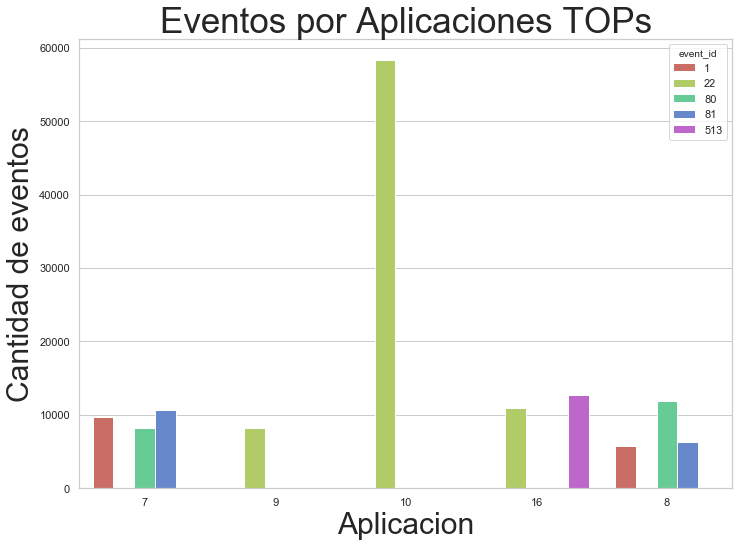

In [14]:
## GRAFICAMOS LA CONDICIÓN DE LOS PRODUCTOS SEGÚN LOS MESES DE OCURRENCIA.


# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="application_id", hue="event_id", data=events_top5, palette="hls", order=[7,9,10,16,8])
g.set_title("Eventos por Aplicaciones TOPs", fontsize=35)
g.set_xlabel("Aplicacion", fontsize=30)
g.set_ylabel("Cantidad de eventos", fontsize=30)

In [15]:
#66     325696
#64     259084
#145    252431
#63     181555
#103    137513
eventos_relevantes = list([66,64,145,63,103])
events_max5 = events[events['application_id'].isin(eventos_relevantes)]
events_max5['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
Name: application_id, dtype: int64

In [16]:
events_max5['event_id'].value_counts()
#22     322334
#31     309187
#161    217846
#1       86749
#162     84898
eventosid_relevantes = list([22,31,161,1,162])
events_max5 = events_max5[events_max5['event_id'].isin(eventosid_relevantes)]
events_max5['event_id'].value_counts()

22     322334
31     309187
161    217846
1       86749
162     84898
Name: event_id, dtype: int64

Text(0,0.5,'Cantidad de aplicaciones')

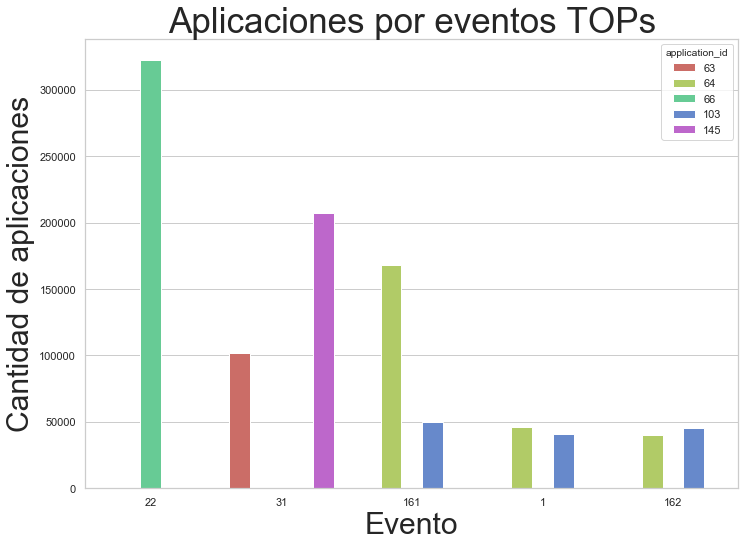

In [17]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="event_id", hue="application_id", data=events_max5, palette="hls", order=[22,31,161,1,162])
g.set_title("Aplicaciones por eventos TOPs", fontsize=35)
g.set_xlabel("Evento", fontsize=30)
g.set_ylabel("Cantidad de aplicaciones", fontsize=30)

In [18]:
crecimiento_eventos = events_max5.groupby(['event_id','hora']).count()[['date']].reset_index()

In [19]:
crecimiento_eventos['event_id'].value_counts()

162    24
161    24
31     24
22     24
1      24
Name: event_id, dtype: int64

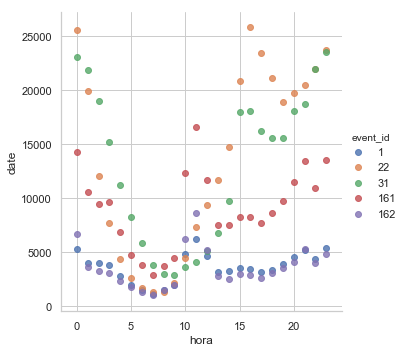

In [20]:
#ax = sns.lineplot(x="hora", y="date", hue="event_id", markers=True, dashes=False, data=crecimiento_eventos)
#ax = sns.lineplot(x="hora", y="date",hue="event_id", data=crecimiento_eventos)
#ax = sns.lineplot(x="hora", y="date", hue="event_id", err_style="bars", ci=68, data=crecimiento_eventos)
sns.lmplot(x='hora', y='date', hue='event_id', data=crecimiento_eventos, fit_reg=False)

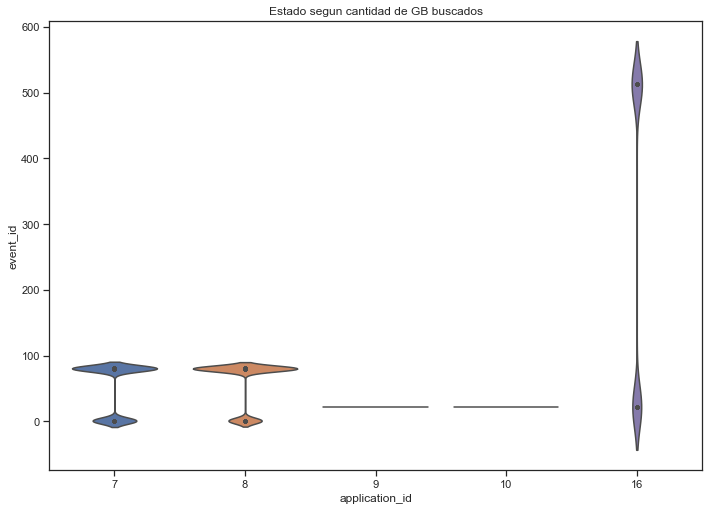

In [21]:
## data6 = installs_filtrados[installs_filtrados['device_language'] == 3.301378e+18]
## data6.head()
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="application_id", y="event_id", data=events_top5, inner="points", ax=ax).set_title("Estado segun cantidad de GB buscados")
plt.show()    

In [22]:
installs_top5 = installs[((installs['application_id'] == 7) | (installs['application_id'] == 9) | (installs['application_id'] == 10) | (installs['application_id'] == 16) | (installs['application_id'] == 8))]
##installs_top5_final = installs_top5[((installs_top5['device_language'] == 3.301378e+18) | (installs_top5['device_language'] == 9.028383e+18) | (installs_top5['device_language'] == 4.621024e+18) | (installs_top5['device_language'] == 6.977049e+18))]
##installs_top5_final.info()
installs_top5.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,mes,dia,hora,nombre_dia,nombre_mes,hora_madrugada,hora_maniana,hora_almuerzo,hora_tarde,hora_noche
146,2019-03-08 09:17:35.298,8,1494519392962156891,1523019489430728012,NaN,False,False,2970470518450881158,NaN,2.983638e+18,...,3,8,9,VIE,MARZO,0,1,0,0,0
147,2019-03-08 03:29:22.651,8,1494519392962156891,6881104975935852715,NaN,False,False,2970470518450881158,NaN,2.136935e+18,...,3,8,3,VIE,MARZO,1,0,0,0,0
148,2019-03-08 03:19:21.124,8,1494519392962156891,6544610948116234078,NaN,False,False,2970470518450881158,NaN,2.136935e+18,...,3,8,3,VIE,MARZO,1,0,0,0,0
149,2019-03-08 02:43:15.289,8,1494519392962156891,2144359349665078056,NaN,False,True,2970470518450881158,NaN,3.624089e+18,...,3,8,2,VIE,MARZO,1,0,0,0,0
150,2019-03-08 02:37:15.607,8,1494519392962156891,82057748147559690,NaN,False,False,2970470518450881158,NaN,5.566960e+18,...,3,8,2,VIE,MARZO,1,0,0,0,0


In [23]:
crecimiento_installs = installs_top5.groupby(['application_id','hora']).count()[['attributed']].reset_index()

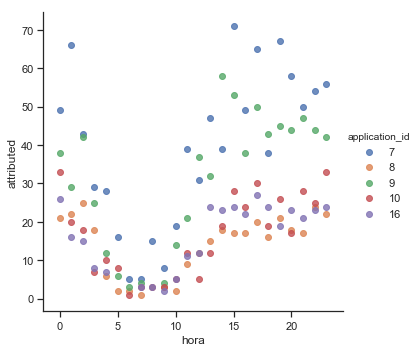

In [24]:


sns.lmplot(x='hora', y='attributed', hue='application_id', data=crecimiento_installs, fit_reg=False)

In [25]:
crecimiento_installs_dleng = installs_top5.groupby(['device_language']).count()[['attributed']].reset_index()
##installs_top5_final = installs_top5[((installs_top5['device_language']
crecimiento_installs_dleng = crecimiento_installs_dleng[crecimiento_installs_dleng['attributed'] >200]
crecimiento_installs_dleng

,device_language,attributed
12,3.301378e+18,1257
15,4.621024e+18,597
21,6.977049e+18,217
24,9.028383e+18,529


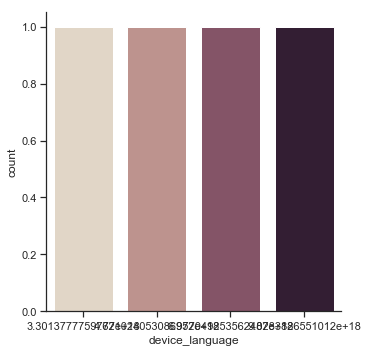

In [26]:
sns.catplot(x="device_language", kind="count", palette="ch:.25", data=crecimiento_installs_dleng);

In [27]:
installs_top5['implicit'].value_counts()
## columnas_relevantes = list(installs_top5.select_dtypes(include=['float64','uint8']).columns)
## installs_filtrados = installs_top5.loc[:, installs_top5.columns.isin(columnas_relevantes)]

False    2052
True      705
Name: implicit, dtype: int64

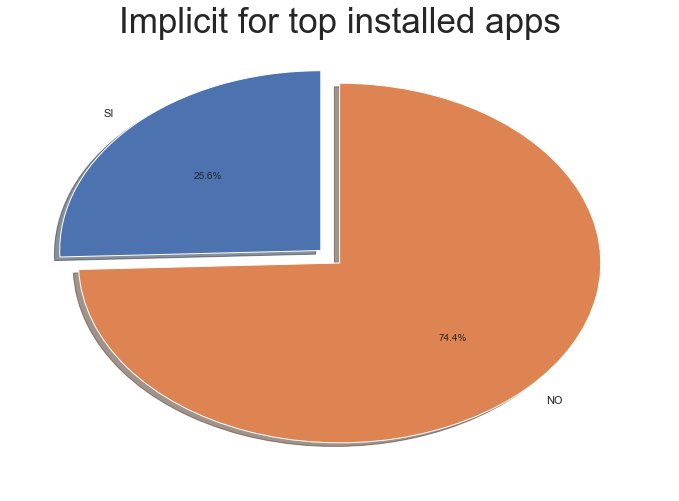

In [28]:
## OBTENEMOS AQUELLOS EVENTOS QUE TIENEN UN NABVEGADOR ASIGNADOS.
si_implicit = installs_top5[installs_top5['implicit'] == True]
no_implicit = installs_top5[installs_top5['implicit'] != True]
## SOLO HA BASRTADO DIFERENCIARLOS EN CHROME O EN OTROS PUESTO QUE LOS DEMÁS SON DESPRECIABLES.
sizes = [si_implicit.implicit.count(), no_implicit.implicit.count()]
nombres = ['SI', 'NO']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Implicit for top installed apps', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

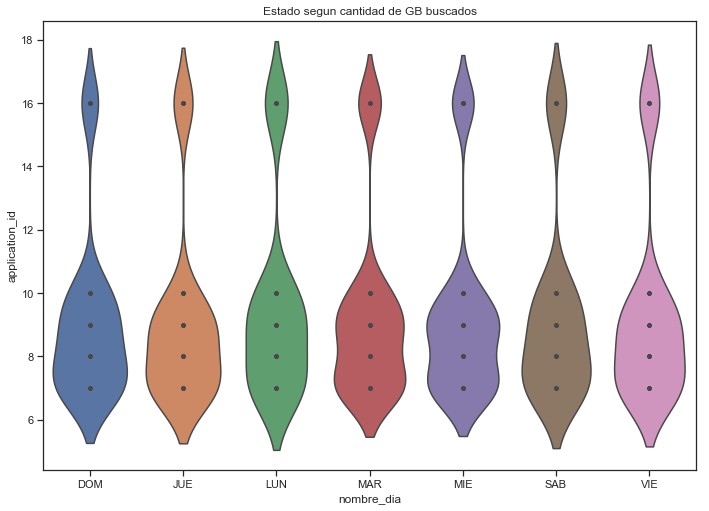

In [29]:
## data6 = installs_filtrados[installs_filtrados['device_language'] == 3.301378e+18]
## data6.head()
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="nombre_dia", y="application_id", data=installs_top5, inner="points", ax=ax).set_title("Estado segun cantidad de GB buscados")
plt.show()    

In [30]:

eventosid_relevantes = list([22,31,161,1,162])
df_heat = events[events["event_id"].isin(eventosid_relevantes)].groupby(["hora", "nombre_dia"])["event_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='event_id', aggfunc='sum')

Text(81.8,0.5,'Horario')

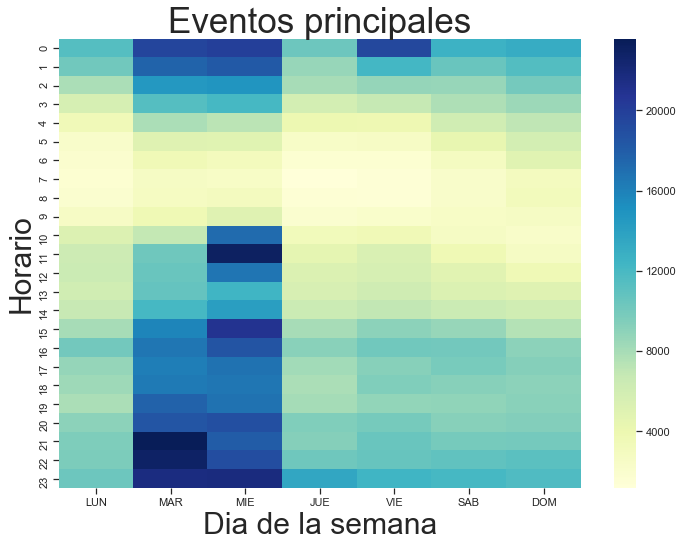

In [31]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Eventos principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

In [32]:
aplicaciones_relevantes = list([7,9,10,16,8])
events_top = events[events['application_id'].isin(aplicaciones_relevantes)]

df_heat = events_top.groupby(["hora", "nombre_dia"])["application_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='application_id', aggfunc='sum')

Text(81.8,0.5,'Horario')

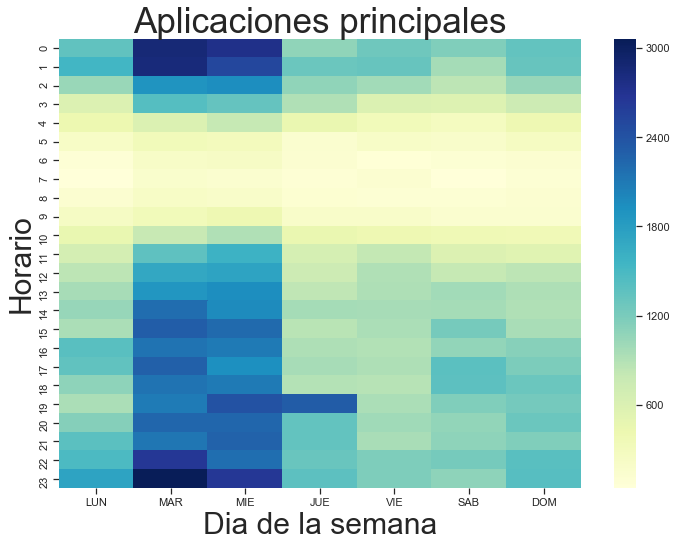

In [33]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Aplicaciones principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

In [34]:
def top_value_count(x, n=5): return x.value_counts().head(n)

In [35]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 30 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null datetime64[ns]
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
mes                26351 non-null int64
dia                26351 n

In [36]:
clicks['source_id'].value_counts()
source_relevantes = list([0,1,6,5,2])
clicks_top = clicks[clicks['source_id'].isin(source_relevantes)]
clicks_top['source_id'].value_counts()
clicks_top = clicks_top[clicks_top['touchX'].notnull()]
clicks_top = clicks_top[clicks_top['touchY'].notnull()]
clicks_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22998 entries, 2 to 26348
Data columns (total 30 columns):
advertiser_id      22998 non-null int64
action_id          0 non-null float64
source_id          22998 non-null int64
created            22998 non-null datetime64[ns]
country_code       22998 non-null int64
latitude           22998 non-null float64
longitude          22998 non-null float64
wifi_connection    22998 non-null bool
carrier_id         22998 non-null float64
trans_id           22998 non-null object
os_minor           22996 non-null float64
agent_device       2641 non-null float64
os_major           22996 non-null float64
specs_brand        22998 non-null int64
brand              5384 non-null float64
timeToClick        22951 non-null float64
touchX             22998 non-null float64
touchY             22998 non-null float64
ref_type           22998 non-null int64
ref_hash           22998 non-null int64
mes                22998 non-null int64
dia                22998 n

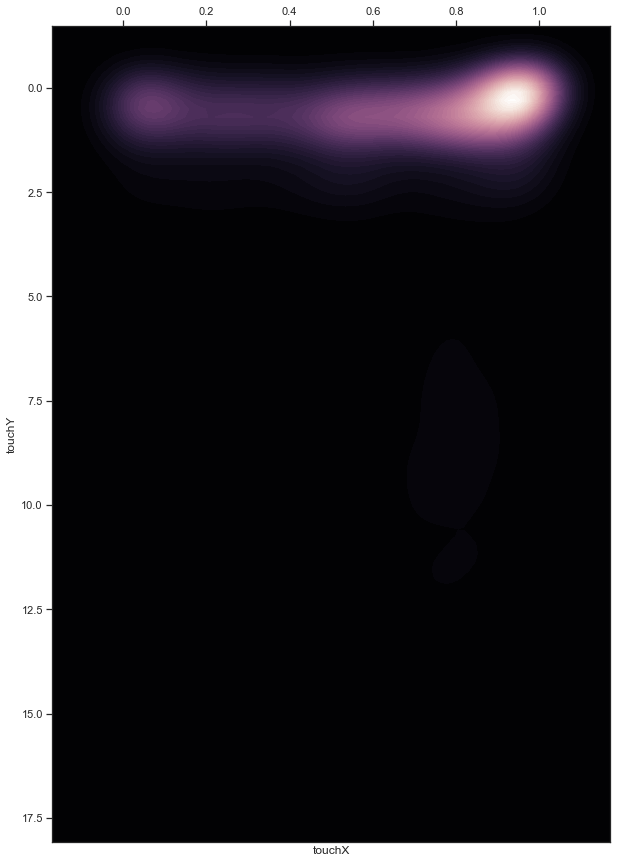

In [99]:
f, ax = plt.subplots(figsize=(10, 15))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
ax.invert_yaxis()
ax.xaxis.set_ticks_position('top')
sns.kdeplot(clicks_top.touchX, clicks_top.touchY, cmap=cmap, n_levels=60, shade=True)

In [41]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 30 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null datetime64[ns]
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
mes                26351 non-null int64
dia                26351 n

In [46]:
clicks['timeToClick'].value_counts()
clicks_group = clicks.groupby('timeToClick').count()[['advertiser_id']].reset_index()
clicks_group

,timeToClick,advertiser_id
0,0.017,1
1,0.026,2
2,0.029,1
3,0.034,1
4,0.036,1
5,0.037,1
6,0.040,1
7,0.042,1
8,0.043,1
9,0.047,1


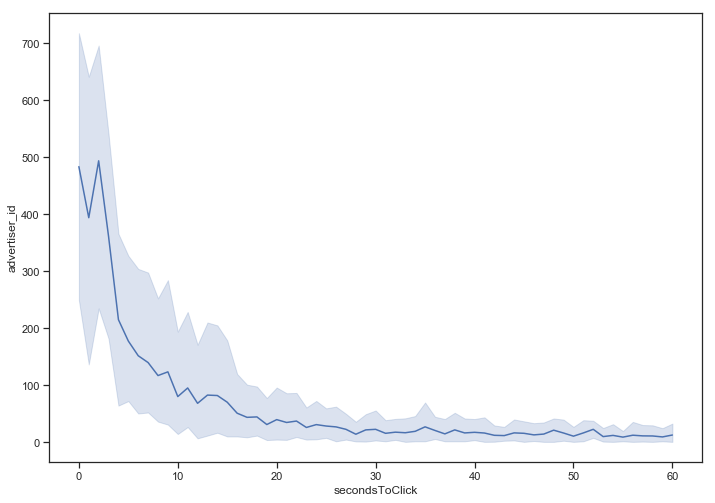

In [67]:
clicks['secondsToClick'] = np.floor(clicks['timeToClick'])
clicks = clicks[clicks['secondsToClick'] < 61.0]
clicks['secondsToClick'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

clicksASD = clicks.groupby(['source_id','secondsToClick']).count()[['advertiser_id']].reset_index()
ax = sns.lineplot(x="secondsToClick", y="advertiser_id", data=clicksASD)



In [43]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64